# Taller 1 - Nivel 0: Palmer Penguins

## MLOps - Pontificia Universidad Javeriana

### Etapa 1: Preparación de datos
### Etapa 2: Creación de modelo

## Paso 1: Importar librerías necesarias

## Paso 2: Carga de datos
Cargamos el dataset de Palmer Penguins y vemos las primeras filas para entender su estructura.

## Paso 3: Exploración inicial del dataset
Revisamos los tipos de datos, valores nulos y estadísticas descriptivas.

## Paso 4: Limpieza de datos
Eliminamos las filas con valores nulos. Se elige esta estrategia porque:
- Solo hay 19 nulos de 344 filas (~5%), la pérdida de datos es mínima.
- No se introducen datos artificiales que podrían sesgar el modelo.
- Alternativa descartada: imputar con media/mediana (numéricas) y moda (categóricas).

## Paso 5: Estadísticas descriptivas
Analizamos las variables numéricas y categóricas para entender la distribución de los datos.

In [6]:
# Distribución de variables categóricas
# value_counts() muestra cuántas veces aparece cada valor
print("=== Distribución por Especie ===")
print(df['species'].value_counts())
print("\n=== Distribución por Isla ===")
print(df['island'].value_counts())
print("\n=== Distribución por Sexo ===")
print(df['sex'].value_counts())

=== Distribución por Especie ===
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

=== Distribución por Isla ===
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

=== Distribución por Sexo ===
sex
male      168
female    165
Name: count, dtype: int64


## Paso 6: Visualizacion exploratoria
Graficos para entender como se distribuyen los datos y como se separan las especies visualmente.

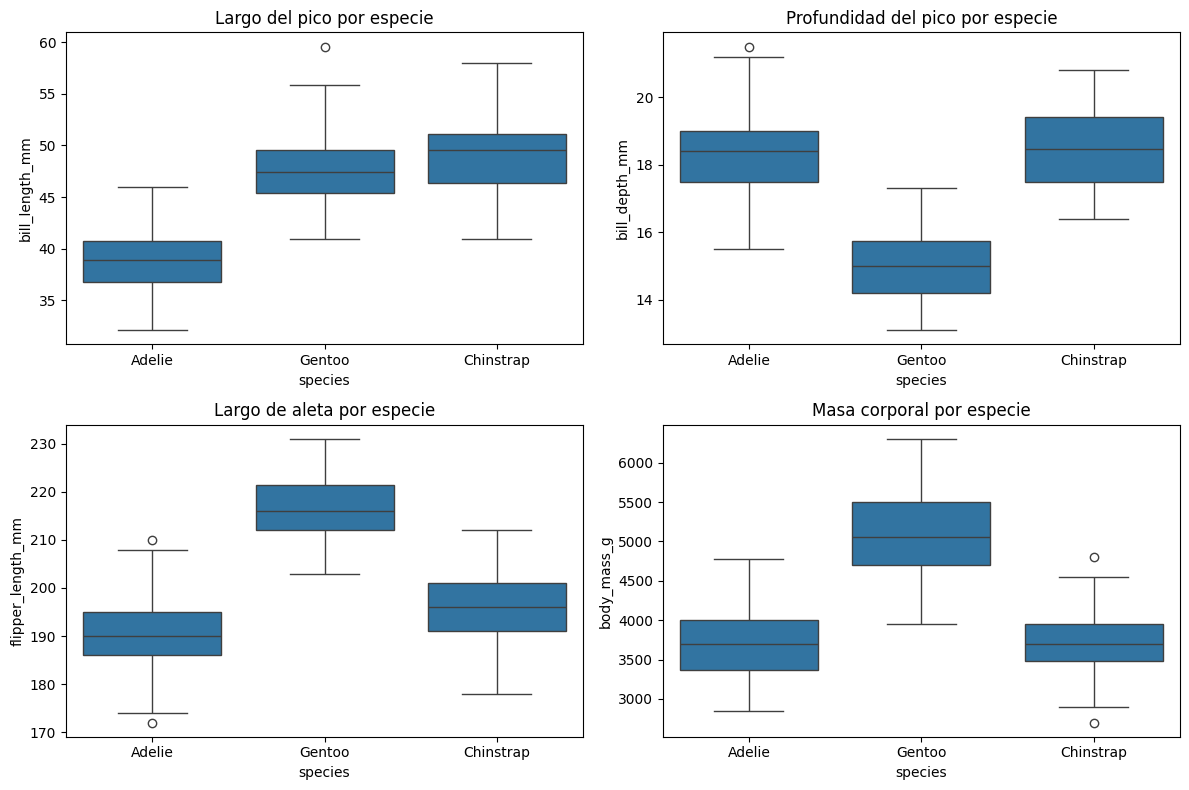

In [8]:
# Boxplots de variables numericas por especie
# Permiten ver como se distribuyen las medidas en cada especie
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axes[0, 0])
axes[0, 0].set_title('Largo del pico por especie')

sns.boxplot(data=df, x='species', y='bill_depth_mm', ax=axes[0, 1])
axes[0, 1].set_title('Profundidad del pico por especie')

sns.boxplot(data=df, x='species', y='flipper_length_mm', ax=axes[1, 0])
axes[1, 0].set_title('Largo de aleta por especie')

sns.boxplot(data=df, x='species', y='body_mass_g', ax=axes[1, 1])
axes[1, 1].set_title('Masa corporal por especie')

plt.tight_layout()
plt.show()

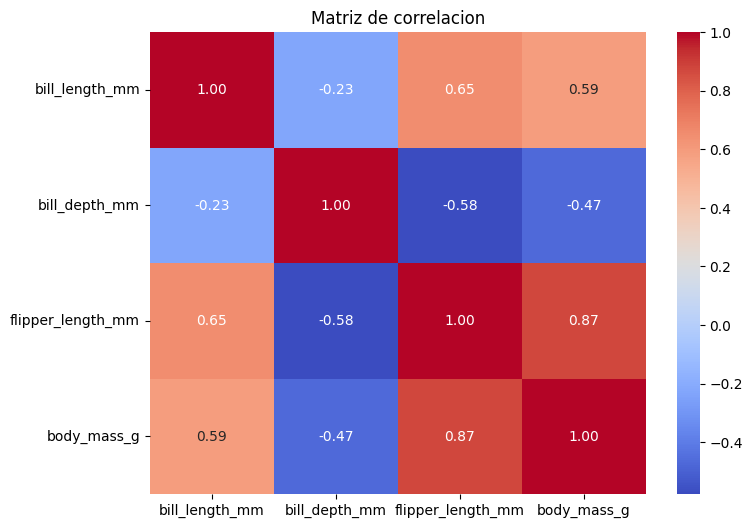

In [10]:
# Heatmap de correlacion entre variables numericas
# Muestra que tan relacionadas estan las variables entre si
plt.figure(figsize=(8, 6))
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion')
plt.show()

---
# Etapa 2: Creacion de modelo

## Paso 7: Transformacion de datos
- Se elimina la columna `year` porque no aporta valor predictivo.
- Se codifican las variables categoricas (`island`, `sex`) a valores numericos usando LabelEncoder para que el modelo pueda procesarlas.
- Se separan las features (X) de la variable objetivo (y = species).

## Paso 8: Division de datos (train/test)
Separamos los datos en conjunto de entrenamiento (80%) y prueba (20%).
- X: features (todas las columnas excepto species)
- y: variable objetivo (species)
- Se usa random_state=42 para reproducibilidad.

## Paso 9: Entrenamiento del modelo
Se entrena un modelo RandomForestClassifier.
- Random Forest es un conjunto de arboles de decision que vota por la clase mas frecuente.
- Funciona bien con datasets pequenos, variables mixtas y no requiere escalado de datos.
- Se usa random_state=42 para reproducibilidad.

## Paso 10: Validacion del modelo
Evaluamos el rendimiento del modelo con los datos de prueba usando:
- **Accuracy**: porcentaje de predicciones correctas.
- **Classification report**: precision, recall y f1-score por cada especie.
- **Matriz de confusion**: muestra aciertos y errores por clase.

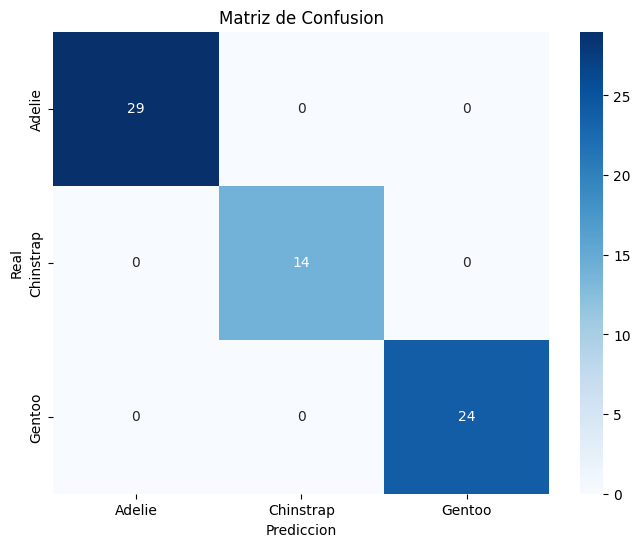

In [15]:
# Matriz de confusion visual
# Las filas son las clases reales, las columnas son las predicciones
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=model_rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_rf.classes_,
            yticklabels=model_rf.classes_)
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de Confusion')
plt.show()

## Paso 11: Guardar el modelo
Guardamos el modelo entrenado y los encoders usando `joblib` para poder reutilizarlos en la API (Etapa 3).
- **modelo**: RandomForestClassifier entrenado
- **encoders**: LabelEncoder de island y sex, necesarios para transformar datos nuevos antes de predecir
